In [32]:
import numpy as np


class Perceptron(object):
    """
    eta :学习率
    n_iter :权重向量的训练次数
    w_ :神经分叉的权重向量
    errors_ :用于记录神经元判断出错的次数
    """

    def __init__(self, eta=0.01, n_iter=10):
        """
        初始化权重向量为0
        加一是因为前面算法提到的w0,也就是步调函数的阈值
        :param eta: 学习率
        :param n_iter: n_iter :权重向量的训练次数
        """
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        输入训练数据,培训神经元,X输入样本向量,y对应样本分类
        :param X:shape[n_samples,n_features]
        :param y:[1,-1]
        :return:
        """
        self.errors_ = []
        self.w_ = np.zeros(1 + X.shape[1])
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                """
                update = η*(y-y')
                """
                update = self.eta * (target - self.predict(xi))

                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                self.errors_.append(errors)
                pass
            pass

    def net_input(self, X):
        """
        z = W0*1 + W1*X1 +...+Wn*Xn
        :param self:
        :param X:
        :return:
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]
        pass

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        pass

    pass

class AdalineGD(object):
    """
    eat: float
    学习效率,处于0和1

    n_iter:int
    对训练数据进行学习改进次数

    w_: 一维向量
    存储权重数值

    error_:
    存储每次迭代改进时,网络对数据进行错误判断的次数
    """

    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """

        :param X:二维数组[n_samples,n_features]
        n_samples 表示X中含有训练数据条目数
        n_features 含有4个数据的一维向量,用于表示一条训练条目

        :param y:一维向量
        用于存储每一训练条目对应的正确分类

        :return:None
        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0, 1, -1)


In [4]:
file = "./pythondata_iris.data.csv"
import pandas as pd
df = pd.read_csv(file,header=None)

In [5]:
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
y = df.loc[0:99,4].values

In [21]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [22]:
y = np.where(y=='Iris-setosa',-1,1)

In [23]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### 把第0列和第2列的数组合在一起作为训练集

In [24]:
X = df.iloc[0:100,[0,2]].values

In [25]:
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

C:\ProgramData\Anaconda3\envs\zyc\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\zyc\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 29923 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\zyc\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\zyc\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\zyc\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 33550 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\envs\zyc\lib\site-packages\matplotlib\backends\backend_

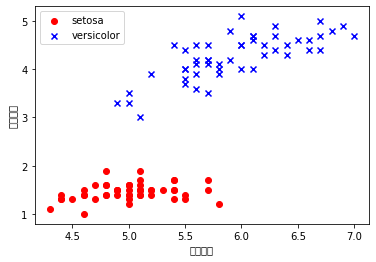

In [26]:
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color = 'blue',marker='x',label='versicolor')
plt.xlabel('花瓣长度')
plt.ylabel('花茎长度')
plt.legend(loc='upper left')


Text(0, 0.5, 'error num')

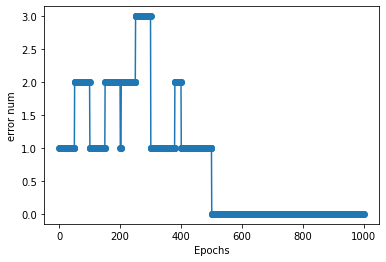

In [27]:
ppn = Perceptron(eta=0.1,n_iter=10)
ppn.fit(X,y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel("Epochs")
plt.ylabel("error num")

In [28]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s','x','o','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min,x1_max = X[:,0].min()-1,X[:,0].max()
    x2_min,x2_max = X[:,1].min()-1,X[:,1].max()

    # print(x1_min,x1_max)
    # print(x2_min,x2_max)

    xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                          np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())


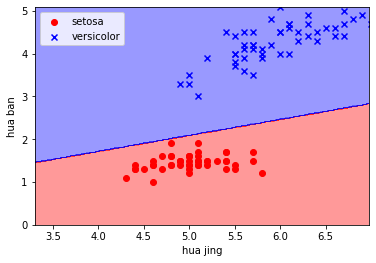

In [29]:
plot_decision_regions(X,y,ppn,resolution=0.02)
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color = 'blue',marker='x',label='versicolor')
plt.xlabel('hua jing')
plt.ylabel('hua ban')
plt.legend(loc='upper left')

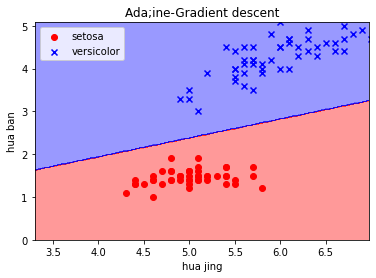

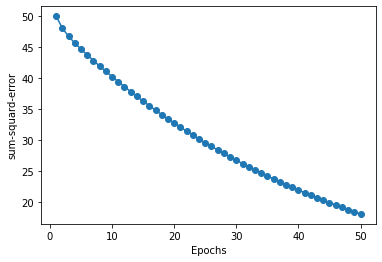

In [37]:
ada = AdalineGD(eta=0.0001,n_iter=50)
ada.fit(X,y)
plot_decision_regions(X,y,classifier=ada)
plt.title('Ada;ine-Gradient descent')
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:,0],X[50:,1],color = 'blue',marker='x',label='versicolor')
plt.xlabel('hua jing')
plt.ylabel('hua ban')
plt.legend(loc='upper left')
plt.show()

plt.plot(range(1,len(ada.cost_)+1),ada.cost_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('sum-squard-error')
plt.show()